# Codebook  
**Authors:** Lauren Baker   
Documenting existing data files of DaanMatch with information about location, owner, "version", source etc.

In [217]:
import boto3
import numpy as np 
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter
import statistics
import math 

In [2]:
client = boto3.client('s3')
resource = boto3.resource('s3')
my_bucket = resource.Bucket('daanmatchdatafiles')

# CSR 2016_2017.xlsx

## TOC:
* [About this dataset](#1)
* [Cleaned datasets](#2)
* [What's in this dataset](#3)
* [Codebook](#4)
    * [Missing values](#4.1)
    * [Summary statistics](#4.2)
* [Columns](#5)
    * [Sheet 1](#5.1)
        * [S.No.](#5.1.1)
        * [Company Name(s)](#5.1.2)
        * [Amount (Actuals)](#5.1.3)
    * [Sheet 2](#5.2)
        * [Development Sectors](#5.2.1)
        * [Amount Spent FY 2014-15 (INR Cr.)](#5.2.2)
        * [Amount Spent FY 2015-16 (INR Cr.)](#5.2.3)
        * [Amount Spent FY 2016-17 (INR Cr.)](#5.2.4)
* [Questions about / Problems with the data](#6)

**About this dataset**  <a class="anchor" id="1"></a>  
Data provided by: National CSR Portal.         
Source: https://csr.gov.in/         
Type: xlsx  
Last Modified: May 29, 2021, 19:52:24 (UTC-07:00)  
Size: 487.4 KB

In [3]:
path = "s3://daanmatchdatafiles/DaanMatch_DataFiles/CSR 2016_2017.xlsx"
CSR_2016_2017 = pd.ExcelFile(path)
print(CSR_2016_2017.sheet_names)

['Sheet1', 'Sheet2', 'Sheet3']


In [4]:
# Show dataframe 1
CSR_2016_2017_1 = CSR_2016_2017.parse('Sheet1')
CSR_2016_2017_1.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,AS Prescribed,NaN,NaN,NaN,Less than Prescribed,NaN,NaN,NaN,More than Prescribed,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,Contributing Companies,NaN,NaN,NaN,Contributing Companies,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"The Ministry of Corporate Affairs (""MCA""), vid..."
3,NaN,S.No.,Company Name(s),Amount (Actuals),NaN,S.No.,Company Name(s),Amount (Actuals),NaN,S.No.,Company Name(s),Amount (Actuals),NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,1,India Infrastructure Finance Company Limited,244600000,NaN,1,Tata Consultancy Services Limited,2802200000,NaN,1,Reliance Industries Limited,6397000000,NaN,NaN,NaN,NaN,NaN,Present Corporate Social Responsibility Norms ...


In [5]:
# Show dataframe 2
CSR_2016_2017_2 = CSR_2016_2017.parse('Sheet2')
CSR_2016_2017_2.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,Development Sector-wise,NaN,NaN,NaN,NaN
2,NaN,Development Sectors,NaN,Amount Spent FY 2014-15 (INR Cr.),Amount Spent FY 2015-16 (INR Cr.),Amount Spent FY 2016-17 (INR Cr.)
3,NaN,1,Clean Ganga Fund,5.47,32.65,24.23
4,NaN,2,"Education, Differently Abled, Livelihood",3188.09,4881.26,5123.83


In [6]:
# Show dataframe 3
CSR_2016_2017_3 = CSR_2016_2017.parse('Sheet3')
CSR_2016_2017_3.head()

""


Sheet 3 is empty.

**Cleaned datasets** <a class="anchor" id="2"></a>

#### Sheet 1

Cleaning up the data in sheet 1:

In [7]:
CSR_2016_2017_1.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,AS Prescribed,NaN,NaN,NaN,Less than Prescribed,NaN,NaN,NaN,More than Prescribed,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,Contributing Companies,NaN,NaN,NaN,Contributing Companies,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"The Ministry of Corporate Affairs (""MCA""), vid..."
3,NaN,S.No.,Company Name(s),Amount (Actuals),NaN,S.No.,Company Name(s),Amount (Actuals),NaN,S.No.,Company Name(s),Amount (Actuals),NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,1,India Infrastructure Finance Company Limited,244600000,NaN,1,Tata Consultancy Services Limited,2802200000,NaN,1,Reliance Industries Limited,6397000000,NaN,NaN,NaN,NaN,NaN,Present Corporate Social Responsibility Norms ...


In [8]:
as_prescribed = CSR_2016_2017_1.copy()
as_prescribed.rename(columns = {'Unnamed: 1' : 'S.No.', 'Unnamed: 2' : 'Company Name(s)', 'Unnamed: 3' : 'Amount (Actuals)'}, inplace = True)
as_prescribed = as_prescribed.iloc[4:401, 1:4]
as_prescribed = as_prescribed.reset_index(drop = True)
as_prescribed

,S.No.,Company Name(s),Amount (Actuals)
0,1,India Infrastructure Finance Company Limited,244600000
1,2,Tata Communications Limited,138500000
2,3,Infosys Bpo Limited,135800000
3,4,Gujarat State Fertilizers & Chemicals Limited,122200000
4,5,Havells India Limited,114800000
...,...,...,...
392,393,Aak Kamani Private Limited,0
393,394,Bombay Oxygen Corporation Limited,0
394,395,20 Microns Limited,0
395,396,Hindustan Coca Cola Holdings Private Limited,0


In [9]:
less_prescribed = CSR_2016_2017_1.copy()
less_prescribed.rename(columns = {'Unnamed: 5' : 'S.No.', 'Unnamed: 6' : 'Company Name(s)', 'Unnamed: 7' : 'Amount (Actuals)'}, inplace = True)
less_prescribed = less_prescribed.iloc[4:, 5:8]
less_prescribed = less_prescribed.reset_index(drop = True)
less_prescribed

,S.No.,Company Name(s),Amount (Actuals)
0,1,Tata Consultancy Services Limited,2802200000
1,2,Infosys Limited,2023000000
2,3,Icici Bank Limited,1715100000
3,4,Axis Bank Limited,1477800000
4,5,Housing Development Finance Corporation Limited,1465400000
...,...,...,...
6808,6809,Madaus Pharmaceuticals Private Limited,0
6809,6810,Yahoo India Private Limited,0
6810,6811,Apeejay Shipping Ltd,0
6811,6812,Parker Multi-Commodities (India) Private Limited,0


In [10]:
more_prescribed = CSR_2016_2017_1.copy()
more_prescribed.rename(columns = {'Unnamed: 9' : 'S.No.', 'Unnamed: 10' : 'Company Name(s)', 'Unnamed: 11' : 'Amount (Actuals)'}, inplace = True)
more_prescribed = more_prescribed.iloc[4:3732, 9:12]
more_prescribed = more_prescribed.reset_index(drop = True)
more_prescribed

,S.No.,Company Name(s),Amount (Actuals)
0,1,Reliance Industries Limited,6397000000
1,2,Ntpc Limited,4918000000
2,3,Oil And Natural Gas Corporation Limited,4089900000
3,4,Itc Limited,2475000000
4,5,Central Coalfields Limited,2146000000
...,...,...,...
3723,3724,Highend Properties Private Limtied,0
3724,3725,P.C. Chandra Jewellery Apex Private Limited,0
3725,3726,Siro Clinpharm Private Limited,0
3726,3727,Divgi Torqtransfer Systems Private Limited,0


#### Sheet 2

Cleaning up the data in sheet 2:

In [11]:
CSR_2016_2017_2.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,Development Sector-wise,NaN,NaN,NaN,NaN
2,NaN,Development Sectors,NaN,Amount Spent FY 2014-15 (INR Cr.),Amount Spent FY 2015-16 (INR Cr.),Amount Spent FY 2016-17 (INR Cr.)
3,NaN,1,Clean Ganga Fund,5.47,32.65,24.23
4,NaN,2,"Education, Differently Abled, Livelihood",3188.09,4881.26,5123.83


In [12]:
sheet_2 = CSR_2016_2017_2.copy()
sheet_2 = sheet_2.rename(columns = {'Unnamed: 2' : 'Development Sectors', 'Unnamed: 3' : 'Amount Spent FY 2014-15 (INR Cr.)', 'Unnamed: 4' : 'Amount Spent FY 2015-16 (INR Cr.)', 'Unnamed: 5' : 'Amount Spent FY 2016-17 (INR Cr.)'})
sheet_2 = sheet_2.iloc[3:, 2:]
sheet_2 = sheet_2.reset_index(drop = True)
sheet_2['Development Sectors'] = sheet_2['Development Sectors'].fillna('Grand Total (in Cr.)')
sheet_2

,Development Sectors,Amount Spent FY 2014-15 (INR Cr.),Amount Spent FY 2015-16 (INR Cr.),Amount Spent FY 2016-17 (INR Cr.)
0,Clean Ganga Fund,5.47,32.65,24.23
1,"Education, Differently Abled, Livelihood",3188.09,4881.26,5123.83
2,Encouraging Sports,57.61,137.58,172.53
3,"Environment, Animal Welfare, Conservation Of R...",853.99,963.22,1282.34
4,"Gender Equality , Women Empowerment , Old Age ...",189.92,337.44,434.75
5,"Health, Eradicating Hunger, Poverty And Malnut...",2525.92,4545,3397
6,Heritage Art And Culture,117.37,117.58,296.85
7,Other Sectors ( Technology Incubator And Benef...,9.5,37.15,58.71
8,Prime Ministers National Relief Fund,228.18,213.7,150.7
9,Rural Development,1059.34,1369.52,1507.45


**What's in this dataset?** <a class="anchor" id="3"></a>

In [13]:
print("Sheet 1:")
print('\n')
print("As Prescribed:")
print("Shape:", as_prescribed.shape)
print("Rows:", as_prescribed.shape[0])
print("Columns:", as_prescribed.shape[1])
print("Each row is a company who spent exactly 2% of their earnings on CSR (Corporate Social Responsibility).")
print('\n')
print("Less Than Prescribed:")
print("Shape:", less_prescribed.shape)
print("Rows:", less_prescribed.shape[0])
print("Columns:", less_prescribed.shape[1])
print("Each row is a company who spent less than 2% of their earnings on CSR (Corporate Social Responsibility).")
print('\n')
print("More Than Prescribed:")
print("Shape:", more_prescribed.shape)
print("Rows:", more_prescribed.shape[0])
print("Columns:", more_prescribed.shape[1])
print("Each row is a company who spent more than 2% of their earnings on CSR (Corporate Social Responsibility).")

print('\n')
print('\n')
print("Sheet 2:")
print('\n')
print("Shape:", sheet_2.shape)
print("Rows:", sheet_2.shape[0])
print("Columns:", sheet_2.shape[1])
print("Each row is a development sector of CSR and how much was spent on that sector each year.")

Sheet 1:


As Prescribed:
Shape: (397, 3)
Rows: 397
Columns: 3
Each row is a company who spent exactly 2% of their earnings on CSR (Corporate Social Responsibility).


Less Than Prescribed:
Shape: (6813, 3)
Rows: 6813
Columns: 3
Each row is a company who spent less than 2% of their earnings on CSR (Corporate Social Responsibility).


More Than Prescribed:
Shape: (3728, 3)
Rows: 3728
Columns: 3
Each row is a company who spent more than 2% of their earnings on CSR (Corporate Social Responsibility).




Sheet 2:


Shape: (15, 4)
Rows: 15
Columns: 4
Each row is a development sector of CSR and how much was spent on that sector each year.


##### So what does this mean?

In India, every company is supposed to spend 2% of their earnings on Corporate Social Responsibility (CSR). The first sheet is showing every company that spent exactly 2%, less than 2%, and more than 2% on CSR in the year 2016-2017. The total amounts shown are in INR (Indian Rupees). The second sheet is showing how these CSR donations are divided up each year. There are several different sectors of where donations go, and this sheet shows how much money is donated to each sector over the span of three years. The total amounts are shown in Cr (Crores). 

**Codebook** <a class="anchor" id="4"></a>

In [14]:
print("Codebook for As Prescribed, Less than Prescribed, and More than Prescribed:")
as_prescribed_columns = [column for column in as_prescribed.columns]
as_prescribed_description = ["Counting how many companies in the DataFrame. The ordering is based on how much each company spent on CSR in 2016-17 in relation to the other companies in the DataFrame.",
                            "The name of the company.",
                            "Amount of money (in Rupees) spent on CSR in 2016-17. Ordered by decreasing amount."]
as_prescribed_dtypes = [dtype for dtype in as_prescribed.dtypes]

data_1 = {"Column Name": as_prescribed_columns, "Description": as_prescribed_description, "Type": as_prescribed_dtypes}
as_prescribed_codebook = pd.DataFrame(data_1)
as_prescribed_codebook.style.set_properties(subset=['Description'], **{'width': '600px'})

Codebook for As Prescribed, Less than Prescribed, and More than Prescribed:


,Column Name,Description,Type
0,S.No.,Counting how many companies in the DataFrame. The ordering is based on how much each company spent on CSR in 2016-17 in relation to the other companies in the DataFrame.,object
1,Company Name(s),The name of the company.,object
2,Amount (Actuals),Amount of money (in Rupees) spent on CSR in 2016-17. Ordered by decreasing amount.,object


In [15]:
print("Codebook for Sheet 2:")
sheet_2_columns = [column for column in sheet_2.columns]
sheet_2_description = ["The different sectors that CSR donations are divided into.", 
                       "Amount of money (in Cr.) spent in total in each sector in 2014-15.", 
                       "Amount of money (in Cr.) spent in total in each sector in 2015-16.", 
                       "Amount of money (in Cr.) spent in total in each sector in 2016-17."]
sheet_2_dtypes = [dtype for dtype in sheet_2.dtypes]

data_2 = {"Column Name": sheet_2_columns, "Description": sheet_2_description, "Type": sheet_2_dtypes}
sheet_2_codebook = pd.DataFrame(data_2)
sheet_2_codebook.style.set_properties(subset=['Description'], **{'width': '600px'})

Codebook for Sheet 2:


,Column Name,Description,Type
0,Development Sectors,The different sectors that CSR donations are divided into.,object
1,Amount Spent FY 2014-15 (INR Cr.),Amount of money (in Cr.) spent in total in each sector in 2014-15.,object
2,Amount Spent FY 2015-16 (INR Cr.),Amount of money (in Cr.) spent in total in each sector in 2015-16.,object
3,Amount Spent FY 2016-17 (INR Cr.),Amount of money (in Cr.) spent in total in each sector in 2016-17.,object


**Missing values** <a class="anchor" id="4.1"></a>

In [16]:
as_prescribed.isnull().sum()

S.No.               0
Company Name(s)     1
Amount (Actuals)    0
dtype: int64

In [17]:
less_prescribed.isnull().sum()

S.No.                0
Company Name(s)     64
Amount (Actuals)     1
dtype: int64

In [18]:
more_prescribed.isnull().sum()

S.No.               0
Company Name(s)     1
Amount (Actuals)    0
dtype: int64

In [19]:
sheet_2.isnull().sum()

Development Sectors                  0
Amount Spent FY 2014-15 (INR Cr.)    0
Amount Spent FY 2015-16 (INR Cr.)    0
Amount Spent FY 2016-17 (INR Cr.)    0
dtype: int64

In [20]:
less_prescribed.loc[less_prescribed['Company Name(s)'].isnull()]

,S.No.,Company Name(s),Amount (Actuals)
3248,3249,NaN,0
3250,3251,NaN,0
3343,3344,NaN,0
3423,3424,NaN,0
3433,3434,NaN,0
...,...,...,...
6526,6527,NaN,0
6662,6663,NaN,0
6664,6665,NaN,0
6794,6795,NaN,0


The 1 missing value in the "Company Name(s)" column in the As Prescribed and More than Prescribed DataFrames are in the last row, which is summing the totals. In the Less than Prescribed DataFrame, however, there are 64 NaN values in the "Company Name(s)" column. As we can see above, 1 of those is the total row and the other 63 are rows where the "Amount (Actuals)" value is 0. We can remove these rows, except for the total row, as they do not provide any information and are most likely mistakes.

In [21]:
#Dropping null rows from less_prescribed
less_prescribed = less_prescribed.dropna()
total_row = {'S.No.' : 'Total', 'Amount (Actuals)' : 39931700000}
less_prescribed = less_prescribed.append(total_row, ignore_index = True)
less_prescribed = less_prescribed.reset_index(drop = True)
less_prescribed

,S.No.,Company Name(s),Amount (Actuals)
0,1,Tata Consultancy Services Limited,2802200000
1,2,Infosys Limited,2023000000
2,3,Icici Bank Limited,1715100000
3,4,Axis Bank Limited,1477800000
4,5,Housing Development Finance Corporation Limited,1465400000
...,...,...,...
6744,6809,Madaus Pharmaceuticals Private Limited,0
6745,6810,Yahoo India Private Limited,0
6746,6811,Apeejay Shipping Ltd,0
6747,6812,Parker Multi-Commodities (India) Private Limited,0


In [22]:
#Checking to make sure we only have 1 NaN value now
less_prescribed.isnull().sum()

S.No.               0
Company Name(s)     1
Amount (Actuals)    0
dtype: int64

**Summary statistics** <a class="anchor" id="4.2"></a>

In [23]:
#Changing the spending columns into type int
as_prescribed["Amount (Actuals)"] = as_prescribed["Amount (Actuals)"].astype(str).astype(int)
less_prescribed["Amount (Actuals)"] = less_prescribed["Amount (Actuals)"].astype(str).astype(int)
more_prescribed["Amount (Actuals)"] = more_prescribed["Amount (Actuals)"].astype(str).astype(int)
sheet_2['Amount Spent FY 2014-15 (INR Cr.)'] = sheet_2['Amount Spent FY 2014-15 (INR Cr.)'].astype(str).astype(float)
sheet_2['Amount Spent FY 2015-16 (INR Cr.)'] = sheet_2['Amount Spent FY 2015-16 (INR Cr.)'].astype(str).astype(float)
sheet_2['Amount Spent FY 2016-17 (INR Cr.)'] = sheet_2['Amount Spent FY 2016-17 (INR Cr.)'].astype(str).astype(float)

In [24]:
as_prescribed.describe()

,Amount (Actuals)
count,3.970000e+02
mean,1.846499e+07
std,1.849822e+08
min,0.000000e+00
25%,9.000000e+05
50%,1.800000e+06
75%,5.300000e+06
max,3.665300e+09


In [25]:
less_prescribed.describe()

,Amount (Actuals)
count,6.749000e+03
mean,1.183337e+07
std,4.902990e+08
min,0.000000e+00
25%,0.000000e+00
50%,0.000000e+00
75%,1.200000e+06
max,3.993170e+10


In [26]:
more_prescribed.describe()

,Amount (Actuals)
count,3.728000e+03
mean,5.368342e+07
std,1.649708e+09
min,0.000000e+00
25%,1.400000e+06
50%,2.850000e+06
75%,8.100000e+06
max,1.000659e+11


In [27]:
sheet_2.describe()

,Amount Spent FY 2014-15 (INR Cr.),Amount Spent FY 2015-16 (INR Cr.),Amount Spent FY 2016-17 (INR Cr.)
count,15.00000,15.000000,15.000000
mean,1342.12000,1915.500667,1795.275333
std,2600.76851,3781.365711,3539.016593
min,5.47000,14.300000,24.230000
25%,107.50000,127.580000,157.895000
50%,228.18000,326.880000,388.860000
75%,1198.86500,1217.370000,1394.895000
max,10065.93000,14366.290000,13464.600000


In [39]:
#Combining the 3 prescribed DataFrames into 1
total_companies = as_prescribed.append(less_prescribed, ignore_index = True).append(more_prescribed, ignore_index = True)
total_companies = total_companies.dropna()
total_companies = total_companies.reset_index(drop = True)
total_companies

,S.No.,Company Name(s),Amount (Actuals)
0,1,India Infrastructure Finance Company Limited,244600000
1,2,Tata Communications Limited,138500000
2,3,Infosys Bpo Limited,135800000
3,4,Gujarat State Fertilizers & Chemicals Limited,122200000
4,5,Havells India Limited,114800000
...,...,...,...
10866,3723,Ampa Housing Development Private Limited,0
10867,3724,Highend Properties Private Limtied,0
10868,3725,P.C. Chandra Jewellery Apex Private Limited,0
10869,3726,Siro Clinpharm Private Limited,0


## Columns
<a class="anchor" id="5"></a>

### Sheet 1
<a class="anchor" id="5.1"></a>
Sheet 1 contains 3 DataFrames: As Prescribed, Less than Prescribed, and More than Prescribed. They all contain the same 3 columns. 

### S.No.
<a class="anchor" id="5.1.1"></a>
Counting how many companies in the DataFrame. The ordering is based on how much each company spent on CSR in 2016-17 in relation to the other companies in the DataFrame.

#### As Prescribed DataFrame:

In [40]:
column = as_prescribed["S.No."]
column

0          1
1          2
2          3
3          4
4          5
       ...  
392      393
393      394
394      395
395      396
396    Total
Name: S.No., Length: 397, dtype: object

In [41]:
print("No. of unique values:", len(column.unique()))
counter = dict(Counter(column))
duplicates = {key:value for key, value in counter.items() if value > 1}
print("Duplicates:", duplicates)

No. of unique values: 397
Duplicates: {}


#### Less Than Prescribed DataFrame:

In [42]:
column = less_prescribed["S.No."]
column

0           1
1           2
2           3
3           4
4           5
        ...  
6744     6809
6745     6810
6746     6811
6747     6812
6748    Total
Name: S.No., Length: 6749, dtype: object

In [43]:
print("No. of unique values:", len(column.unique()))
counter = dict(Counter(column))
duplicates = {key:value for key, value in counter.items() if value > 1}
print("Duplicates:", duplicates)

No. of unique values: 6749
Duplicates: {}


#### More Than Prescribed DataFrame:

In [44]:
column = more_prescribed["S.No."]
column

0           1
1           2
2           3
3           4
4           5
        ...  
3723     3724
3724     3725
3725     3726
3726     3727
3727    Total
Name: S.No., Length: 3728, dtype: object

In [45]:
print("No. of unique values:", len(column.unique()))
counter = dict(Counter(column))
duplicates = {key:value for key, value in counter.items() if value > 1}
print("Duplicates:", duplicates)

No. of unique values: 3728
Duplicates: {}


### Company Name(s)
<a class="anchor" id="5.1.2"></a>
The name of the company.

#### As Prescribed DataFrame:

In [73]:
column = as_prescribed['Company Name(s)']
as_companies = np.array(column)
column

0       India Infrastructure Finance Company Limited
1                        Tata Communications Limited
2                                Infosys Bpo Limited
3      Gujarat State Fertilizers & Chemicals Limited
4                              Havells India Limited
                           ...                      
392                       Aak Kamani Private Limited
393                Bombay Oxygen Corporation Limited
394                               20 Microns Limited
395     Hindustan Coca Cola Holdings Private Limited
396                                              NaN
Name: Company Name(s), Length: 397, dtype: object

In [74]:
print("No. of unique values:", len(column.unique()))

# Check for duplicates
counter = dict(Counter(column))
duplicates = { key:value for key, value in counter.items() if value > 1}
print("Duplicates:", duplicates)
if len(duplicates) > 0:
    print("No. of duplicates:", len(duplicates))

No. of unique values: 397
Duplicates: {}


#### Less Than Prescribed DataFrame:

In [75]:
column = less_prescribed['Company Name(s)']
less_companies = np.array(column)
column

0                      Tata Consultancy Services Limited
1                                        Infosys Limited
2                                     Icici Bank Limited
3                                      Axis Bank Limited
4        Housing Development Finance Corporation Limited
                              ...                       
6744              Madaus Pharmaceuticals Private Limited
6745                         Yahoo India Private Limited
6746                                Apeejay Shipping Ltd
6747    Parker Multi-Commodities (India) Private Limited
6748                                                 NaN
Name: Company Name(s), Length: 6749, dtype: object

In [76]:
print("No. of unique values:", len(column.unique()))

# Check for duplicates
counter = dict(Counter(column))
less_duplicates = { key:value for key, value in counter.items() if value > 1}
print("Duplicates:", less_duplicates)
if len(less_duplicates) > 0:
    print("No. of duplicates:", len(less_duplicates))

No. of unique values: 6734
Duplicates: {'General Insurance Corporation Of India': 2, 'Pnb Housing Finance Limited': 2, 'Housing And Urban Development Corporation Limited': 2, 'Pennwalt Limited': 2, 'Acme Resources Limited': 2, 'Zen Securities Ltd': 2, 'Unicorn Natural Products Limited': 2, 'Runner Marketing Private Limited': 2, 'Rare Rose Premises Private Limited': 2, 'Suncity Infrastructures Private Limited': 2, 'Crossroads Mills Private Limited': 2, 'Bagrrys India Limited.': 2, 'Puran Associates Private Limited': 2, 'Burmans Finvest Private Limited': 2, 'Indrus Countertrade Private Limited': 2}
No. of duplicates: 15


In [77]:
less_duplicates

{'General Insurance Corporation Of India': 2,
 'Pnb Housing Finance Limited': 2,
 'Housing And Urban Development Corporation Limited': 2,
 'Pennwalt Limited': 2,
 'Acme Resources Limited': 2,
 'Zen Securities Ltd': 2,
 'Unicorn Natural Products Limited': 2,
 'Runner Marketing Private Limited': 2,
 'Rare Rose Premises Private Limited': 2,
 'Suncity Infrastructures Private Limited': 2,
 'Crossroads Mills Private Limited': 2,
 'Bagrrys India Limited.': 2,
 'Puran Associates Private Limited': 2,
 'Burmans Finvest Private Limited': 2,
 'Indrus Countertrade Private Limited': 2}

In [78]:
less_prescribed[less_prescribed['Company Name(s)'].isin(less_duplicates)].sort_values('Company Name(s)')

,S.No.,Company Name(s),Amount (Actuals)
6368,6428,Acme Resources Limited,0
1490,1491,Acme Resources Limited,1500000
4186,4207,Bagrrys India Limited.,0
3850,3862,Bagrrys India Limited.,0
6701,6765,Burmans Finvest Private Limited,0
5537,5581,Burmans Finvest Private Limited,0
6569,6631,Crossroads Mills Private Limited,0
3650,3661,Crossroads Mills Private Limited,0
14,15,General Insurance Corporation Of India,490000000
346,347,General Insurance Corporation Of India,12600000


We can see above that of the 15 companies repeated twice in the less_prescribed DataFrame, 7 of them have different values in the "Amount (Actuals)" column. Therefore, 8 companies were added twice with the same value in the "Amount (Actuals)" column, and 7 were added twice with completely different values. This is an error in the dataset.

#### More Than Prescribed DataFrame:

In [79]:
column = more_prescribed['Company Name(s)']
more_companies = np.array(column)
column

0                       Reliance Industries Limited
1                                      Ntpc Limited
2           Oil And Natural Gas Corporation Limited
3                                       Itc Limited
4                        Central Coalfields Limited
                           ...                     
3723             Highend Properties Private Limtied
3724    P.C. Chandra Jewellery Apex Private Limited
3725                 Siro Clinpharm Private Limited
3726     Divgi Torqtransfer Systems Private Limited
3727                                            NaN
Name: Company Name(s), Length: 3728, dtype: object

In [80]:
print("No. of unique values:", len(column.unique()))

# Check for duplicates
counter = dict(Counter(column))
more_duplicates = { key:value for key, value in counter.items() if value > 1}
print("Duplicates:", more_duplicates)
if len(more_duplicates) > 0:
    print("No. of duplicates:", len(more_duplicates))

No. of unique values: 3718
Duplicates: {'Bses Yamuna Power Limited': 2, 'Reliance Infrastructure Limited': 2, 'Sbi Life Insurance Company Limited': 2, 'Jaiprakash Power Ventures Limited': 2, 'Bses Rajdhani Power Limited': 2, 'Mapaex Remedies Private Limited': 2, 'Chowdry Associates': 2, 'Keshav Power Limited': 2, 'Green Infra Wind Farm Assets Limited': 2, 'Atrenta (India) Private Limited': 2}
No. of duplicates: 10


In [81]:
more_duplicates

{'Bses Yamuna Power Limited': 2,
 'Reliance Infrastructure Limited': 2,
 'Sbi Life Insurance Company Limited': 2,
 'Jaiprakash Power Ventures Limited': 2,
 'Bses Rajdhani Power Limited': 2,
 'Mapaex Remedies Private Limited': 2,
 'Chowdry Associates': 2,
 'Keshav Power Limited': 2,
 'Green Infra Wind Farm Assets Limited': 2,
 'Atrenta (India) Private Limited': 2}

In [82]:
more_prescribed[more_prescribed['Company Name(s)'].isin(more_duplicates)].sort_values('Company Name(s)')

,S.No.,Company Name(s),Amount (Actuals)
2263,2264,Atrenta (India) Private Limited,2100000
2434,2435,Atrenta (India) Private Limited,1800000
374,375,Bses Rajdhani Power Limited,26700000
432,433,Bses Rajdhani Power Limited,22400000
11,12,Bses Yamuna Power Limited,1573500000
1008,1009,Bses Yamuna Power Limited,7100000
1425,1426,Chowdry Associates,4200000
1415,1416,Chowdry Associates,4200000
2072,2073,Green Infra Wind Farm Assets Limited,2400000
2585,2586,Green Infra Wind Farm Assets Limited,1600000


We can see above that of the 10 companies repeated twice in the more_prescribed DataFrame, 9 of them have different values in the "Amount (Actuals)" column. Therefore, 1 company was added twice with the same value in the "Amount (Actuals)" column, and 9 were added twice with completely different values. This is an error in the dataset.

#### Total Companies DataFrame:

In [83]:
column = total_companies['Company Name(s)']
all_companies = np.array(column)
column

0         India Infrastructure Finance Company Limited
1                          Tata Communications Limited
2                                  Infosys Bpo Limited
3        Gujarat State Fertilizers & Chemicals Limited
4                                Havells India Limited
                             ...                      
10866         Ampa Housing Development Private Limited
10867               Highend Properties Private Limtied
10868      P.C. Chandra Jewellery Apex Private Limited
10869                   Siro Clinpharm Private Limited
10870       Divgi Torqtransfer Systems Private Limited
Name: Company Name(s), Length: 10871, dtype: object

In [84]:
print("No. of unique values:", len(column.unique()))

# Check for duplicates
counter = dict(Counter(column))
all_duplicates = { key:value for key, value in counter.items() if value > 1}
print("Duplicates:", all_duplicates)
if len(all_duplicates) > 0:
    print("No. of duplicates:", len(all_duplicates))

No. of unique values: 10831
Duplicates: {'Barclays Investments & Loans (India) Limited.': 2, 'Aadhar Housing Finance Limited': 2, 'Green Infra Solar Farms Limited': 2, 'Hindusthan Consultancy And Services Limited': 2, 'Madhur Housing And Development Company(A Pvt Co.With Unlimited Liabili': 2, 'Panchsheel Investment Company (A Pvt.Co.With Unlimited Liability)': 2, 'Avail Financial Services Limited': 2, 'General Insurance Corporation Of India': 2, 'Pnb Housing Finance Limited': 2, 'Housing And Urban Development Corporation Limited': 2, 'Ujjivan Financial Services Limited': 2, 'Amd India Private Limited': 2, 'Pennwalt Limited': 2, 'Acme Resources Limited': 2, 'Green Infra Wind Energy Project Limited': 2, 'Green Infra Btv Limited': 2, 'Karun Carpets Private Limited': 2, 'Black Knight India Solutions Private Limited': 2, 'Zen Securities Ltd': 2, 'Unicorn Natural Products Limited': 2, 'Runner Marketing Private Limited': 2, 'Rare Rose Premises Private Limited': 2, 'Suncity Infrastructures Pr

In [85]:
all_duplicates

{'Barclays Investments & Loans (India) Limited.': 2,
 'Aadhar Housing Finance Limited': 2,
 'Green Infra Solar Farms Limited': 2,
 'Hindusthan Consultancy And Services Limited': 2,
 'Madhur Housing And Development Company(A Pvt Co.With Unlimited Liabili': 2,
 'Panchsheel Investment Company (A Pvt.Co.With Unlimited Liability)': 2,
 'Avail Financial Services Limited': 2,
 'General Insurance Corporation Of India': 2,
 'Pnb Housing Finance Limited': 2,
 'Housing And Urban Development Corporation Limited': 2,
 'Ujjivan Financial Services Limited': 2,
 'Amd India Private Limited': 2,
 'Pennwalt Limited': 2,
 'Acme Resources Limited': 2,
 'Green Infra Wind Energy Project Limited': 2,
 'Green Infra Btv Limited': 2,
 'Karun Carpets Private Limited': 2,
 'Black Knight India Solutions Private Limited': 2,
 'Zen Securities Ltd': 2,
 'Unicorn Natural Products Limited': 2,
 'Runner Marketing Private Limited': 2,
 'Rare Rose Premises Private Limited': 2,
 'Suncity Infrastructures Private Limited': 2,

In [86]:
total_companies[total_companies['Company Name(s)'].isin(all_duplicates)].sort_values('Company Name(s)')

,S.No.,Company Name(s),Amount (Actuals)
189,190,Aadhar Housing Finance Limited,1900000
2786,2391,Aadhar Housing Finance Limited,500000
6764,6428,Acme Resources Limited,0
1886,1491,Acme Resources Limited,1500000
8735,1592,Amd India Private Limited,3500000
...,...,...,...
586,191,Ujjivan Financial Services Limited,26800000
3020,2625,Unicorn Natural Products Limited,400000
2964,2569,Unicorn Natural Products Limited,400000
2896,2501,Zen Securities Ltd,500000


In [128]:
#Making a DataFrame for companies that are repeated in 2 different DataFrames
dups_3 = all_duplicates.keys()
dups_4 = []

for dup in dups_3:
    if (not dup in(less_duplicates)):
        if (not dup in (more_duplicates)):
            dups_4.append(dup)

as_repeats = as_prescribed[as_prescribed['Company Name(s)'].isin(dups_4)].sort_values('Company Name(s)')
as_repeats['DataFrame'] = 'as_prescribed'

less_repeats = less_prescribed[less_prescribed['Company Name(s)'].isin(dups_4)].sort_values('Company Name(s)')
less_repeats['DataFrame'] = 'less_prescribed'

more_repeats = more_prescribed[more_prescribed['Company Name(s)'].isin(dups_4)].sort_values('Company Name(s)')
more_repeats['DataFrame'] = 'more_prescribed'

mixed_repeats = as_repeats.append(less_repeats, ignore_index = True).append(more_repeats, ignore_index = True)
mixed_repeats.sort_values('Company Name(s)')

,S.No.,Company Name(s),Amount (Actuals),DataFrame
0,190,Aadhar Housing Finance Limited,1900000,as_prescribed
7,2391,Aadhar Housing Finance Limited,500000,less_prescribed
17,1592,Amd India Private Limited,3500000,more_prescribed
8,796,Amd India Private Limited,4000000,less_prescribed
1,391,Avail Financial Services Limited,100000,as_prescribed
18,3659,Avail Financial Services Limited,100000,more_prescribed
2,62,Barclays Investments & Loans (India) Limited.,10400000,as_prescribed
19,1065,Barclays Investments & Loans (India) Limited.,6500000,more_prescribed
20,2509,Black Knight India Solutions Private Limited,1700000,more_prescribed
9,2330,Black Knight India Solutions Private Limited,600000,less_prescribed


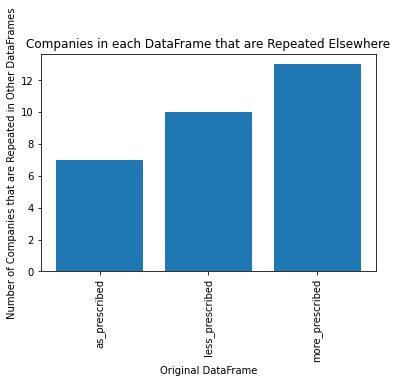

In [126]:
df_chart = mixed_repeats.groupby('DataFrame').agg(len)
plt.bar(df_chart.index, df_chart["S.No."])
plt.title("Companies in each DataFrame that are Repeated Elsewhere")
plt.xlabel("Original DataFrame")
plt.ylabel('Number of Companies that are Repeated in Other DataFrames')
plt.xticks(rotation = 90)
plt.show()

As you can see above, there are 15 companies whose names are repeated in 2 different datasets. Therefore, those 15 companies each appear twice in total throughout the as_prescribed, less_prescribed, and more_prescribed DataFrames. 13 companies in the more_prescribed DataFrame, 10 companies in the less_prescribed DataFrame, and 7 companies in the as_prescribed DataFrame appear in another DataFrame. This means that the data for those 15 companies is innacurate and is an error in the data.

### Amount (Actuals)
<a class="anchor" id="5.1.3"></a>
Amount of money (in Rupees) spent on CSR in 2016-17. Ordered by decreasing amount.

#### As Prescribed DataFrame:

In [191]:
column = as_prescribed['Amount (Actuals)']
column

0       244600000
1       138500000
2       135800000
3       122200000
4       114800000
          ...    
392             0
393             0
394             0
395             0
396    3665300000
Name: Amount (Actuals), Length: 397, dtype: int64

In [192]:
print("No. of unique values:", len(column.unique()))

# Check for duplicates
counter = dict(Counter(column))
duplicates = { key:value for key, value in counter.items() if value > 1}
print("Duplicates:", duplicates)
if len(duplicates) > 0:
    print("No. of duplicates:", len(duplicates))

No. of unique values: 135
Duplicates: {20200000: 2, 19800000: 2, 14900000: 2, 13000000: 2, 10000000: 2, 9300000: 2, 7900000: 2, 7500000: 2, 7100000: 2, 7000000: 2, 6000000: 2, 5800000: 2, 5600000: 2, 5400000: 2, 5300000: 2, 4800000: 2, 4700000: 2, 4600000: 2, 4500000: 4, 4400000: 3, 4100000: 2, 4000000: 2, 3900000: 2, 3800000: 2, 3200000: 3, 3100000: 3, 3000000: 3, 2900000: 3, 2800000: 6, 2700000: 2, 2600000: 8, 2500000: 6, 2400000: 4, 2300000: 3, 2200000: 6, 2100000: 5, 2000000: 6, 1900000: 5, 1800000: 9, 1700000: 6, 1600000: 10, 1500000: 11, 1400000: 13, 1300000: 9, 1200000: 10, 1100000: 10, 1000000: 23, 900000: 21, 800000: 15, 700000: 20, 600000: 11, 500000: 8, 400000: 7, 300000: 7, 200000: 8, 100000: 3, 0: 4}
No. of duplicates: 57


In [193]:
as_prescribed.groupby('Amount (Actuals)').agg(len).sort_values('S.No.', ascending = False)

,S.No.,Company Name(s)
Amount (Actuals),,
1000000,23,23
900000,21,21
700000,20,20
800000,15,15
1400000,13,13
...,...,...
11000000,1,1
10400000,1,1
10200000,1,1


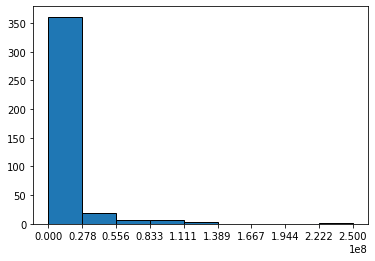

In [194]:
bins= np.linspace(0, 250000000, 10)
plt.hist(as_prescribed['Amount (Actuals)'], bins=bins, edgecolor="k")
plt.xticks(bins)

plt.show()

In [195]:
#Mean:
as_mean = np.mean(np.array(column))
as_mean

18464987.40554156

#### Less Than Prescribed DataFrame:

In [196]:
column = less_prescribed['Amount (Actuals)']
column

0        2802200000
1        2023000000
2        1715100000
3        1477800000
4        1465400000
           ...     
6744              0
6745              0
6746              0
6747              0
6748    39931700000
Name: Amount (Actuals), Length: 6749, dtype: int64

In [198]:
print("No. of unique values:", len(column.unique()))

# Check for duplicates
counter = dict(Counter(column))
duplicates = { key:value for key, value in counter.items() if value > 1}
print("Duplicates:", duplicates)
if len(duplicates) > 0:
    print("No. of duplicates:", len(duplicates))

No. of unique values: 389
Duplicates: {56000000: 2, 48900000: 2, 43900000: 2, 42200000: 2, 37100000: 2, 37000000: 2, 35800000: 2, 33400000: 2, 32900000: 2, 30800000: 2, 30300000: 2, 30200000: 2, 29800000: 2, 28500000: 2, 28400000: 3, 27200000: 2, 25200000: 2, 24500000: 3, 24400000: 2, 23900000: 2, 23000000: 3, 22500000: 2, 22200000: 2, 22100000: 2, 22000000: 2, 21600000: 2, 21300000: 3, 20600000: 3, 20000000: 3, 19200000: 2, 18900000: 2, 18800000: 2, 18700000: 2, 18600000: 3, 18500000: 3, 18300000: 2, 18100000: 4, 17500000: 2, 17400000: 2, 17300000: 2, 17000000: 2, 16900000: 2, 16800000: 2, 16300000: 3, 16100000: 2, 15700000: 2, 15500000: 3, 15400000: 2, 15200000: 3, 15100000: 3, 15000000: 2, 14800000: 2, 14500000: 3, 14400000: 2, 14100000: 4, 13700000: 2, 13600000: 2, 13500000: 2, 13300000: 2, 13100000: 3, 12800000: 5, 12600000: 3, 12500000: 3, 12400000: 3, 12300000: 2, 12200000: 3, 12100000: 2, 12000000: 2, 11900000: 5, 11700000: 5, 11600000: 3, 11500000: 2, 11300000: 2, 11000000: 6,

In [199]:
less_prescribed.groupby('Amount (Actuals)').agg(len).sort_values('S.No.', ascending = False)

,S.No.,Company Name(s)
Amount (Actuals),,
0,3607,3607
200000,172,172
300000,171,171
500000,168,168
100000,159,159
...,...,...
34300000,1,1
34900000,1,1
35100000,1,1


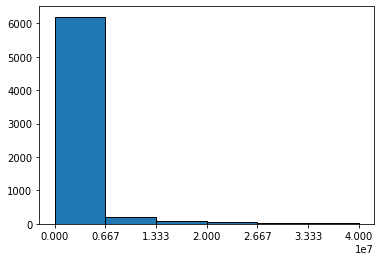

In [200]:
bins= np.linspace(0, 40000000, 7)
plt.hist(less_prescribed['Amount (Actuals)'], bins=bins, edgecolor="k")
plt.xticks(bins)

plt.show()

In [201]:
#Mean:
less_mean = np.mean(np.array(column))
less_mean

11833367.906356497

#### More Than Prescribed DataFrame:

In [202]:
column = more_prescribed['Amount (Actuals)']
column

0         6397000000
1         4918000000
2         4089900000
3         2475000000
4         2146000000
            ...     
3723               0
3724               0
3725               0
3726               0
3727    100065900000
Name: Amount (Actuals), Length: 3728, dtype: int64

In [203]:
print("No. of unique values:", len(column.unique()))

# Check for duplicates
counter = dict(Counter(column))
duplicates = { key:value for key, value in counter.items() if value > 1}
print("Duplicates:", duplicates)
if len(duplicates) > 0:
    print("No. of duplicates:", len(duplicates))

No. of unique values: 556
Duplicates: {142600000: 2, 137400000: 3, 114700000: 2, 98700000: 2, 80000000: 2, 73700000: 2, 64500000: 2, 63000000: 2, 60000000: 3, 58600000: 2, 57300000: 2, 54500000: 2, 50100000: 2, 50000000: 2, 47000000: 3, 43500000: 2, 40700000: 2, 40000000: 3, 39700000: 2, 39600000: 2, 38500000: 4, 37900000: 2, 37500000: 2, 36100000: 2, 36000000: 2, 35400000: 2, 35000000: 2, 34700000: 2, 32800000: 3, 32700000: 2, 32200000: 2, 32000000: 2, 31800000: 2, 31500000: 3, 31400000: 3, 31000000: 3, 30700000: 4, 30500000: 4, 27300000: 3, 26100000: 2, 25800000: 2, 25600000: 2, 25300000: 2, 25100000: 4, 25000000: 5, 24900000: 3, 24600000: 2, 24400000: 3, 24300000: 2, 24000000: 2, 23800000: 3, 23100000: 3, 22900000: 2, 22700000: 3, 22600000: 2, 22400000: 3, 22100000: 4, 21900000: 2, 21700000: 2, 20900000: 2, 20800000: 2, 20600000: 2, 20500000: 4, 20400000: 2, 20300000: 2, 20200000: 2, 20100000: 6, 20000000: 8, 19800000: 2, 19700000: 2, 19400000: 2, 19100000: 2, 19000000: 3, 18900000:

In [204]:
more_prescribed.groupby('Amount (Actuals)').agg(len).sort_values('S.No.', ascending = False)

,S.No.,Company Name(s)
Amount (Actuals),,
1000000,127,127
2000000,106,106
1200000,106,106
1500000,98,98
1100000,91,91
...,...,...
49800000,1,1
49300000,1,1
49000000,1,1


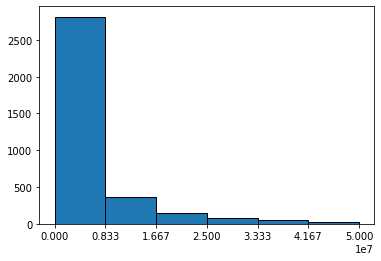

In [205]:
bins= np.linspace(0, 50000000, 7)
plt.hist(more_prescribed['Amount (Actuals)'], bins=bins, edgecolor="k")
plt.xticks(bins)

plt.show()

In [206]:
#Mean:
more_mean = np.mean(np.array(column))
more_mean

53683422.74678112

### Sheet 2
<a class="anchor" id="5.2"></a>
Sheet 2 contains information on how much money was spent towards each Development Sector of CSR in the years 2014-15, 2015-16, and 2016-17.

### Development Sectors
<a class="anchor" id="5.2.1"></a>
The different sectors that CSR donations are divided into.

In [207]:
column = sheet_2['Development Sectors']
column

0                                      Clean Ganga Fund
1              Education, Differently Abled, Livelihood
2                                    Encouraging Sports
3     Environment, Animal Welfare, Conservation Of R...
4     Gender Equality , Women Empowerment , Old Age ...
5     Health, Eradicating Hunger, Poverty And Malnut...
6                              Heritage Art And Culture
7     Other Sectors ( Technology Incubator And Benef...
8                  Prime Ministers National Relief Fund
9                                     Rural Development
10                                Slum Area Development
11                                   Swachh Bharat Kosh
12                                       Any Other Fund
13                                   NEC/ Not Mentioned
14                                 Grand Total (in Cr.)
Name: Development Sectors, dtype: object

In [208]:
print("No. of unique values:", len(column.unique()))

# Check for duplicates
counter = dict(Counter(column))
duplicates = { key:value for key, value in counter.items() if value > 1}
print("Duplicates:", duplicates)
if len(duplicates) > 0:
    print("No. of duplicates:", len(duplicates))

No. of unique values: 15
Duplicates: {}


### Amount Spent FY 2014-15 (INR Cr.)
<a class="anchor" id="5.2.2"></a>
Amount of money (in Cr.) spent in total in each sector in 2014-15.

In [209]:
column = sheet_2['Amount Spent FY 2014-15 (INR Cr.)']
column

0         5.47
1      3188.09
2        57.61
3       853.99
4       189.92
5      2525.92
6       117.37
7         9.50
8       228.18
9      1059.34
10      101.14
11      113.86
12      277.09
13     1338.39
14    10065.93
Name: Amount Spent FY 2014-15 (INR Cr.), dtype: float64

In [218]:
#Making sure first 14 rows sum to last value
total = np.sum(np.array(column)[0:14])
math.isclose(total, column[14], abs_tol = 0.5)

True

### Amount Spent FY 2015-16 (INR Cr.)
<a class="anchor" id="5.2.3"></a>
Amount of money (in Cr.) spent in total in each sector in 2015-16.

In [219]:
column = sheet_2['Amount Spent FY 2015-16 (INR Cr.)']
column

0        32.65
1      4881.26
2       137.58
3       963.22
4       337.44
5      4545.00
6       117.58
7        37.15
8       213.70
9      1369.52
10       14.30
11      324.72
12      326.88
13     1065.22
14    14366.29
Name: Amount Spent FY 2015-16 (INR Cr.), dtype: float64

In [220]:
#Making sure first 14 rows sum to last value
total = np.sum(np.array(column)[0:14])
math.isclose(total, column[14], abs_tol = 0.5)

True

### Amount Spent FY 2016-17 (INR Cr.)
<a class="anchor" id="5.2.4"></a>
Amount of money (in Cr.) spent in total in each sector in 2016-17.

In [221]:
column = sheet_2['Amount Spent FY 2016-17 (INR Cr.)']
column

0        24.23
1      5123.83
2       172.53
3      1282.34
4       434.75
5      3397.00
6       296.85
7        58.71
8       150.70
9      1507.45
10       49.81
11      165.09
12      412.38
13      388.86
14    13464.60
Name: Amount Spent FY 2016-17 (INR Cr.), dtype: float64

In [225]:
#Making sure first 14 rows sum to last value
total = np.sum(np.array(column)[0:14])
math.isclose(total, column[14], abs_tol = 0.5)

True

**Questions about / Problems with the data**  <a class="anchor" id="6"></a>  

* Repeated values
    * There are several company names that are repeated within the same dataframe, or even within other dataframes
    * 15 repeated companies in the Less than Prescribed data (7 with two different amount values)
    * 10 repeated companies in the More than Prescribed data (9 with two different amount values)
    * 15 comapanies included in two different DataFrames
* Amount value is zero
    * In all 3 tables, there are companies whose "Amount (Actuals)" value is equal to zero
    * 4 companies in the As Prescribed data have amount as 0
        * The only way this can be accurate is if the companies have an income of zero, since 2% of zero is zero
    * 3607 companies in the Less than Prescribed data have amount as 0
        * This could be accurate since 0 is less than 2% of any value greater than zero, yet seems unlikely based on the high value
    * 48 companies in the More than Prescribed data have amount as 0
        * This must be an error since zero is never more than 2% of any value, even if the income total is 0